In [1]:
# Importing Necessary Libararies
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from tqdm import tqdm

# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Data

## Loading

In [2]:
data_file_path = "/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv"
df = pd.read_csv(data_file_path)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Describing

In [3]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


## Preprocessing

1) Removing Irrelevant Columns

In [5]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
cols_to_remove = ['SNo', 'Last Update']
df = df.drop(cols_to_remove, axis=1)

2) Handling Date Column

In [7]:
# currently an object
df['ObservationDate'].dtype

dtype('O')

In [8]:
# converting to pandas datatime object
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [9]:
# now a pandas datetime object
df['ObservationDate'].dtype

dtype('<M8[ns]')

3) Adding Active Column

In [10]:
df['Active'] = df['Confirmed'] - df['Recovered'] - df['Deaths']

In [11]:
df.head(2)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0


4) Checking Null Values

In [12]:
# Finding columns with null values
df.isna().sum()

ObservationDate        0
Province/State     78103
Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
dtype: int64

In [13]:
# displaying null rows
df[df['Province/State'].isna()].sample(5)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
36439,2020-06-06,NaN,Panama,16004.0,386.0,10118.0,5500.0
173551,2020-12-07,NaN,Uganda,23200.0,207.0,9374.0,13619.0
135003,2020-10-17,NaN,Slovenia,12416.0,184.0,6148.0,6084.0
6096,2020-03-16,NaN,Vietnam,61.0,0.0,16.0,45.0
19707,2020-04-28,NaN,Serbia,6630.0,125.0,870.0,5635.0


In [14]:
df['Province/State'].value_counts()

Province/State
Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY                1
Queens County, NY                  1
Johnson County, IA                 1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: count, Length: 736, dtype: int64

In [15]:
# removing State column as it has few value counts
df.pop("Province/State")

0                     Anhui
1                   Beijing
2                 Chongqing
3                    Fujian
4                     Gansu
                ...        
306424    Zaporizhia Oblast
306425              Zeeland
306426             Zhejiang
306427      Zhytomyr Oblast
306428         Zuid-Holland
Name: Province/State, Length: 306429, dtype: object

In [16]:
# joining rows with similar country and date by aggregating the other columns
df = df.groupby(['ObservationDate', 'Country/Region']).sum().reset_index()

5) Renaming Columns

In [17]:
column_mapping = {
    'ObservationDate': 'date',
    'Country/Region': 'country',
    'Confirmed': 'confirmed',
    'Deaths': 'deaths',
    'Recovered': 'recovered',
    'Active': 'active'
}

# Use the rename method to rename the columns
df = df.rename(columns=column_mapping)

# Exploratory Data Analysis
EDA includes the creation of visual representations, such as charts and graphs, to help understand the distribution and patterns within a dataset. Visualizations can reveal trends, outliers, and relationships between variables.

In [18]:
df.sample(15)

,date,country,confirmed,deaths,recovered,active
86274,2021-05-24,South Korea,136983.0,1938.0,126993.0,8052.0
55871,2020-12-19,Saint Vincent and the Grenadines,100.0,0.0,82.0,18.0
51984,2020-11-29,Portugal,294799.0,4427.0,209534.0,80838.0
35144,2020-09-03,Belgium,86544.0,9899.0,18513.0,58132.0
62672,2021-01-23,Sierra Leone,3120.0,77.0,2187.0,856.0
72677,2021-03-16,Bosnia and Herzegovina,146437.0,5637.0,122107.0,18693.0
27896,2020-07-27,Burkina Faso,1100.0,53.0,926.0,121.0
12664,2020-05-08,Guinea,2009.0,11.0,663.0,1335.0
79985,2021-04-22,Mauritania,18192.0,454.0,17553.0,185.0
35179,2020-09-03,Egypt,99425.0,5479.0,75415.0,18531.0


In [19]:
group = df.groupby(["date"]).sum({
	'deaths': 'sum', 'recovered': 'sum', 'active': 'sum'
}).reset_index()

group.head(3)

,date,confirmed,deaths,recovered,active
0,2020-01-22,557.0,17.0,30.0,510.0
1,2020-01-23,1097.0,34.0,60.0,1003.0
2,2020-01-24,941.0,26.0,39.0,876.0


## Global Covid Analysis

Basic Information

In [20]:
# Calculate total unique countries, confirmed cases, deaths, and recovered
total_countries = df['country'].nunique()
total_confirmed = df['confirmed'].sum()
total_deaths = df['deaths'].sum()
total_recovered = df['recovered'].sum()

print(f"Total unique countries: {total_countries}")
print(f"Total confirmed cases: {int(total_confirmed)}")
print(f"Total deaths: {int(total_deaths)}")
print(f"Total recovered: {int(total_recovered)}")


Total unique countries: 229
Total confirmed cases: 26252051758
Total deaths: 624013017
Total recovered: 15450237912


Time-Series Representation

In [21]:
# Create separate plots for active cases, deaths, and recovered with dark theme
fig_active = px.line(group, x='date', y='active', title='Active Cases Over Time', template='plotly_dark')
fig_deaths = px.line(group, x='date', y='deaths', title='Deaths Over Time', template='plotly_dark')
fig_recovered = px.line(group, x='date', y='recovered', title='Recovered Over Time', template='plotly_dark')

# Create a combined plot for all with dark theme
fig_combined = px.line(group, x='date', y=['active', 'deaths', 'recovered'],
                       labels={'value': 'Cases', 'variable': 'Status'},
                       title='Combined Cases Over Time', template='plotly_dark')

# Show the plots
fig_active.show()
fig_deaths.show()
fig_recovered.show()
fig_combined.show()

Bi-weekly Time-Series Representation

In [22]:
# Group the daily data by every 2 weeks and sum the values
weekly_data = df.resample('2W-Mon', on='date').sum()

# Create a new DataFrame with 2-week data
weekly_df = pd.DataFrame({
    'date': weekly_data.index,
    'deaths': weekly_data['deaths'],
    'recovered': weekly_data['recovered'],
    'active': weekly_data['active']
})

# Plotly Express Line Plot with Scatter Points
fig = px.line(weekly_df, x='date', y=['deaths', 'recovered', 'active'],
              labels={'value': 'Cases', 'variable': 'Status'},
              title='Bi-Weekly Growth of Deaths, Recovered, and Active Cases',
              line_shape='linear',  # 'linear' or 'hv' for horizontal or vertical lines
              template='plotly_dark',  # You can change the template as per your preference
              hover_data={'date': '|%B %d, %Y'},
              )
fig.update_traces(mode='lines+markers')

# Update the layout for better readability
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of Cases'),
    legend=dict(title='Status'),
)

# Show the interactive plot
fig.show()


Mortality and Recovery

In [23]:
# Calculate Mortality Rate and Recovery Rate
new_group = {
	"date": group.date,
    'mortality_rate': (group['deaths'] / group['confirmed']) * 100,
    'recovery_rate': (group['recovered'] / group['confirmed']) * 100,
}

# Plotly Express Line Plot with Scatter Points for Mortality Rate
fig_mortality = px.line(new_group, x='date', y='mortality_rate',
                        labels={'mortality_rate': 'Mortality Rate (%)'},
                        title='Mortality Rate Over Time',
                        line_shape='linear',
                        template='plotly_dark',
                        hover_data={'date': '|%B %d, %Y'},
                        )
fig_mortality.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Mortality Rate (%)'),
)

# Plotly Express Line Plot with Scatter Points for Recovery Rate
fig_recovery = px.line(new_group, x='date', y='recovery_rate',
                       labels={'recovery_rate': 'Recovery Rate (%)'},
                       title='Recovery Rate Over Time',
                       line_shape='linear',
                       template='plotly_dark',
                       hover_data={'date': '|%B %d, %Y'},
                       )
fig_recovery.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Recovery Rate (%)'),
)

# Show the interactive plots
fig_mortality.show()
fig_recovery.show()

`Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100`
`Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100`
- Mortality rate is showing a considerable for a pretty long time, which is positive sign
- Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

Increase in cases

In [24]:
# Calculate daily differences for deaths, recovered, and active cases
new_group = pd.DataFrame({
	"date": group.date.iloc[1:],
    "daily_deaths": group['deaths'].diff().iloc[1:],
    "daily_recovered": group['recovered'].diff().iloc[1:],
    "daily_active": group['active'].diff().iloc[1:],
})

new_group = new_group.resample('3D', on='date').mean().reset_index()

# Function to remove outliers based on Z-score
def remove_outliers(series, threshold=2):
    z_scores = stats.zscore(series)
    return series[abs(z_scores) < threshold]

# Remove outliers from the daily rates
new_group['daily_deaths'] = remove_outliers(new_group['daily_deaths'])
new_group['daily_recovered'] = remove_outliers(new_group['daily_recovered'])
new_group['daily_active'] = remove_outliers(new_group['daily_active'])

# Plotly Express Line Plot with Scatter Points for Daily Rate of Increase in Deaths
fig_deaths = px.line(new_group, x='date', y='daily_deaths',
                     labels={'daily_deaths': 'Daily Increase in Deaths'},
                     title='Daily Increase in Deaths Over Time (Outliers Removed)',
                     line_shape='linear',
                     template='plotly_dark',
                     hover_data={'date': '|%B %d, %Y'},
                     )
fig_deaths.update_traces(mode='lines+markers')
fig_deaths.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Daily Increase'),
)

# Plotly Express Line Plot with Scatter Points for Daily Rate of Increase in Recovered
fig_recovered = px.line(new_group, x='date', y='daily_recovered',
                        labels={'daily_recovered': 'Daily Increase in Recovered'},
                        title='Daily Increase in Recovered Over Time (Outliers Removed)',
                        line_shape='linear',
                        template='plotly_dark',
                        hover_data={'date': '|%B %d, %Y'},
                        )
fig_recovered.update_traces(mode='lines+markers')
fig_recovered.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Daily Increase'),
)

# Plotly Express Line Plot with Scatter Points for Daily Rate of Increase in Active Cases
fig_active = px.line(new_group, x='date', y='daily_active',
                     labels={'daily_active': 'Daily Increase in Active Cases'},
                     title='Daily Increase in Active Cases Over Time (Outliers Removed)',
                     line_shape='linear',
                     template='plotly_dark',
                     hover_data={'date': '|%B %d, %Y'},
                     )
fig_active.update_traces(mode='lines+markers')
fig_active.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Daily Increase'),
)

# Show the interactive plots
fig_deaths.show()
fig_recovered.show()
fig_active.show()

Above Graphs show that the daily increase kept growing for some time and had a slump at the end

Rate of Increase in Cases

In [25]:
# Calculate daily percentage changes for deaths, recovered, and active cases
new_group = pd.DataFrame({
    "date": group.date.iloc[1:],
    "daily_deaths_rate": (group['deaths'].diff().iloc[1:] / group['deaths'].shift(1).iloc[1:]) * 100,
    "daily_recovered_rate": (group['recovered'].diff().iloc[1:] / group['recovered'].shift(1).iloc[1:]) * 100,
    "daily_active_rate": (group['active'].diff().iloc[1:] / group['active'].shift(1).iloc[1:]) * 100,
})

new_group = new_group.resample('2W', on='date').mean().reset_index()

# Function to remove outliers based on Z-score
def remove_outliers(series, threshold=2):
    z_scores = stats.zscore(series)
    return series[abs(z_scores) < threshold]

# Remove outliers from the daily rates
new_group['daily_deaths_rate'] = remove_outliers(new_group['daily_deaths_rate'])
new_group['daily_recovered_rate'] = remove_outliers(new_group['daily_recovered_rate'])
new_group['daily_active_rate'] = remove_outliers(new_group['daily_active_rate'])

fig = px.line(new_group, x='date', y=['daily_deaths_rate', 'daily_recovered_rate', 'daily_active_rate'],
                     title='Rate of Weekly increase in cases',
                     line_shape='linear',
                     template='plotly_dark',
                     hover_data={'date': '|%B %d, %Y'},
                     )
fig.update_traces(mode='lines+markers')
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Bi-weekly Increase'),
)
fig.show()

plot shows that intitally there a very high rate of increase in covid, but as time passed the rate of increase gradually dampered, because many had already been affected and successful lockdowns were maintained

## Country Ratio Analysis
Contribution of Each Country in Global Pandemic

In [26]:
# Grouping by Country
group_country = df.drop(['date'], axis=1).groupby('country').mean()

# Sorting on the bases of confirmed cases
group_country = group_country.sort_values(by='confirmed', ascending=False)

# Keeping only the Top n countries
n = 15
group_country = group_country.head(n)

# Showing the data
group_country

,confirmed,deaths,recovered,active
country,,,,
US,1.224523e+07,249602.757085,1.018970e+06,1.097666e+07
India,6.639441e+06,91408.895062,5.968292e+06,5.797398e+05
Brazil,5.768669e+06,157879.586957,5.029733e+06,5.810563e+05
Russia,1.918657e+06,37863.338144,1.630321e+06,2.504730e+05
France,1.738189e+06,46180.524390,1.410720e+05,1.550936e+06
UK,1.616071e+06,60148.420619,4.799118e+03,1.551123e+06
Turkey,1.390879e+06,15373.388764,1.267799e+06,1.077062e+05
Spain,1.341140e+06,39390.710744,1.264331e+05,1.175316e+06
Italy,1.312772e+06,53609.694845,1.005773e+06,2.533892e+05


Time-Series Representation of Each Country

In [27]:
for col in group_country.columns:
	fig = px.pie(group_country, names=group_country.index, values=col,
				title=f'Contribution of Top {n} Countries in {col} Cases',
				labels={col: f'{col} Cases'},
                template='plotly_dark',)
	fig.update_traces(textposition='inside', textinfo='percent+label')
	fig.show()

The pie charts clearly show that US, Brazil, India, France, UK, Italy were the main players of Covid. Compartively in the top 5 countires US has the biggest share in active cases but had the lowest in recoveries, this is because of austerity period in America

Bar Representation for country comparison

In [28]:
# Create an interactive bar chart
fig = px.bar(group_country,
             y=['confirmed', 'deaths', 'recovered', 'active'],
             labels={'value': 'Number of Cases', 'variable': 'Case Type'},
             title='Confirmed, Deaths, Recovered, and Active Cases by Country',
             width=1000,
             height=600,
             template='plotly_dark',)

# Customize the layout
fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  yaxis_title='Number of Cases',
                  xaxis_title='Country',
                  legend_title='Case Type',
                  barmode='stack',
                  hovermode='closest')

# Show the plot
fig.show()

Bar Representation for country comparison with seperate graphs for each column

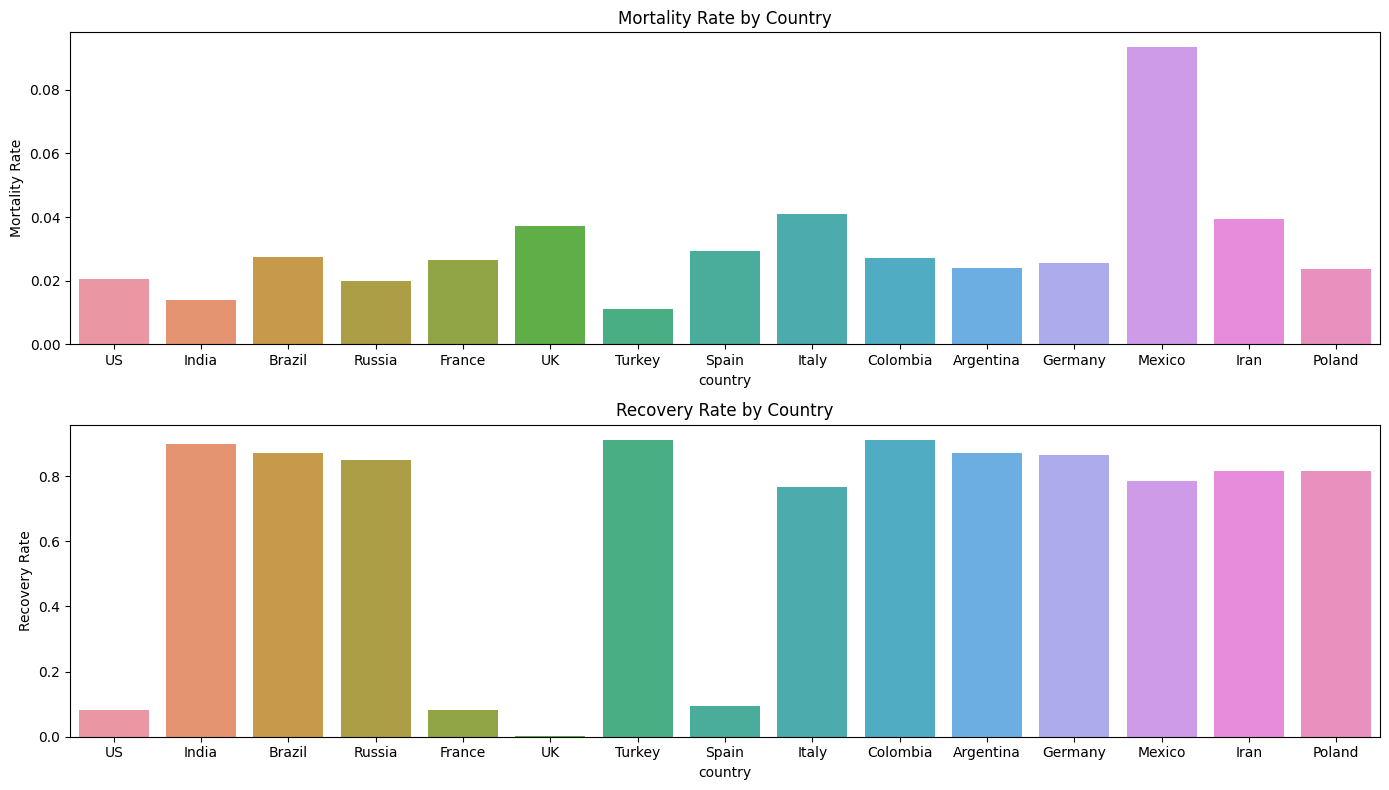

In [29]:
# Calculate Mortality and Recovery rates
mortality = group_country['deaths'] / group_country['confirmed']
recovery = group_country['recovered'] / group_country['confirmed']

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(14, 8))

# Bar chart for Mortality
plt.subplot(2, 1, 1)
sns.barplot(x=group_country.index, y=mortality)
plt.title('Mortality Rate by Country')
plt.ylabel('Mortality Rate')

# Bar chart for Recovery
plt.subplot(2, 1, 2)
sns.barplot(x=group_country.index, y=recovery)
plt.title('Recovery Rate by Country')
plt.ylabel('Recovery Rate')

# Adjust layout
plt.tight_layout()
plt.show()

Bar chart is proving the interpretations of pie chart, that US, UK, France were having a tought time

## Individual Country Ananlysis

In [30]:
top_countries = df.groupby('country')['confirmed'].max().nlargest(5).index
df_top = df[df['country'].isin(top_countries)].copy()  # Use .copy() to create a copy of the DataFrame

# Add columns for mortality and recovery rate using .loc
df_top.loc[:, 'Mortality'] = df_top['deaths'] / df_top['confirmed']
df_top.loc[:, 'Recovery Rate'] = df_top['recovered'] / df_top['confirmed']

# Apply Logarithm
df_top['deaths'] = np.log1p(df_top['deaths'])
df_top['recovered'] = np.log1p(df_top['recovered'])
df_top['active'] = np.log1p(df_top['active'])

# Fill NA
df_top = df_top.fillna(0)

# Drop 'confirmed' column
df_top.drop("confirmed", axis=1, inplace=True)

# Rename columns
df_top.rename(columns={
    'deaths': 'Total Deaths',
    'recovered': 'Recovered Cases',
    'active': 'Active Cases',
}, inplace=True)

df_top

,date,country,Total Deaths,Recovered Cases,Active Cases,Mortality,Recovery Rate
9,2020-01-22,US,0.000000,0.000000,0.693147,0.000000,0.000000
11,2020-01-23,Brazil,0.000000,0.000000,0.000000,0.000000,0.000000
26,2020-01-23,US,0.000000,0.000000,0.693147,0.000000,0.000000
29,2020-01-24,France,0.000000,0.000000,1.098612,0.000000,0.000000
39,2020-01-24,US,0.000000,0.000000,1.098612,0.000000,0.000000
...,...,...,...,...,...,...,...
87109,2021-05-29,Brazil,13.041279,16.489399,14.230477,0.027991,0.880074
87146,2021-05-29,France,11.603853,12.876153,15.467909,0.019147,0.068337
87164,2021-05-29,India,12.694570,17.052396,14.564333,0.011686,0.912511
87266,2021-05-29,Turkey,10.763673,15.443629,11.455604,0.009028,0.972937


In [31]:
for col in df_top.columns[2:]:
    fig = px.line(
        df_top,
        x='date',
        y=col,
        color='country',
        title=f'{col} Over Time',
        line_group='country'
    )
    fig.update_layout(template='plotly_dark')
    fig.show()

# Machine Learning Analysis

## Vectorizing the Data
Converting data from pandas dataframe to strucutred numpy arrays

In [32]:
cols_to_use = ['deaths', 'recovered', 'active']
unavailable = -1
min_rows_thres = 400

# max length
max_length_per_col = df.country.value_counts().max()

# countries
countries = df.country.value_counts().sort_values()[::-1]
countries = countries[countries > min_rows_thres]
countries = countries.keys().values
countries.sort()

# dates
dates = df.date.sort_values().unique()

X = []
for country in tqdm(countries):
	sub_df = df[df.country == country].set_index('date')
	vals = []
	for date in dates:
		if (date in sub_df.index):
			val = sub_df.loc[date, cols_to_use].values.tolist()
		else:
			val = [unavailable] * len(cols_to_use)
		vals.extend(val)
	X.append(vals)

X = np.array(X)
X.shape

100%|██████████| 188/188 [00:58<00:00,  3.23it/s]


(188, 1482)

## Clustering
This step puts similar countries in clusters. Thus creating groups for countries with similar patterns

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a pipeline with three steps: standardization, PCA, and a cluster
pipeline = Pipeline([
    ('scaler', StandardScaler()),	# Step 1: Standardization
    ('pca', PCA(n_components=100)),	# Step 2: PCA for dimensionality reduction
    ('cluster', KMeans(
		n_clusters=4,
		init='random',
		n_init='auto',
		max_iter=5
    ))			# Step 3: Cluster
])

# passing data through the pipeline
clusters = pipeline.fit_predict(X)

# getting country of each cluster
cluster_countries = []
for c in pd.Series(clusters).unique():
	cluster_countries.append(countries[clusters == c])

In [34]:
print("PRINTING THE CLUSTERS")

for i, cluster in enumerate(cluster_countries):
	if len(cluster) < 20:
		print(f"\n----> Cluster {i+1}")
		print(cluster)

PRINTING THE CLUSTERS

----> Cluster 2
['Brazil' 'India']

----> Cluster 3
['Colombia' 'France' 'Germany' 'Iran' 'Italy' 'Mainland China' 'Mexico'
 'Peru' 'Russia' 'Spain' 'Turkey' 'UK']

----> Cluster 4
['US']


- countries in one group show identical patterns
- Cluster 4: US has the most unique behaviour, will highest active cases, but lowest recovery rate in the top affected countries
- Cluster 3: France, Germany, Italy, UK face, etc, faced similar challenges
- Cluster 2: this group basicall includes the countries that were affected by covid, but showed a good recovery rate
- Cluster 1: this includes all the other countries

## Forecasting
Predicting the Future of cases in different scenarios

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def forecast(country, column, degree, n_days):

    series = df.groupby("country").get_group(country)[['date', column]]

    # Sort the DataFrame by date
    series = series.sort_values(by='date')

    # Extracting the features (days since the start)
    days_since_start = (series['date'] - series['date'].min()).dt.days.values.reshape(-1, 1)

    # Fitting a polynomial regression model
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(days_since_start)

    model = LinearRegression()
    model.fit(X_poly, series[column])

    # Predicting for the existing points
    predictions_existing = model.predict(X_poly)

    # Predicting for the next n days
    future_days = np.arange(days_since_start.max() + 1, days_since_start.max() + 1 + n_days).reshape(-1, 1)
    future_poly = poly.transform(future_days)
    predictions_future = model.predict(future_poly)

    # Creating an interactive plot using plotly
    fig = go.Figure()

    # Actual data
    fig.add_trace(go.Scatter(x=series['date'], y=series[column], mode='lines', name='Actual'))

    # Predicted data for existing points
    fig.add_trace(go.Scatter(x=series['date'], y=predictions_existing, mode='lines', name='Predicted (Existing)'))

    # Predicted data for future points
    future_dates = pd.date_range(start=series['date'].max() + pd.DateOffset(1), periods=n_days)
    fig.add_trace(go.Scatter(x=future_dates, y=predictions_future, mode='lines', name='Predicted (Future)'))

    # Layout customization with dark theme
    fig.update_layout(
        title=f'Polynomial Regression - Actual vs. Predicted ({country})',
        xaxis_title='Date',
        yaxis_title=f'{column} Cases',
        template='plotly_dark'  # Set the dark theme
    )

    # Show the plot
    fig.show()

In [36]:
"""
columns: 'confirmed', 'deaths', 'recovered', 'active'
countries = 'Hong Kong', 'Japan', 'Kiribati', 'Macau', 'US'
"""
None

In [37]:
forecast(
	country='US',
	column='deaths',
	degree=1,
	n_days=50,
)

In [38]:
forecast(
	country='Hong Kong',
	column='deaths',
	degree=3,
	n_days=50,
)

In [39]:
forecast(
	country='Brazil',
	column='active',
	degree=3,
	n_days=50,
)